# Clustering

[Visual kmeans
](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [1]:
# ==========================================
# CONFIGURACIÓN INICIAL DEL NOTEBOOK
# ==========================================

# Verificamos que tenemos Python 3.5 o superior
import sys
assert sys.version_info >= (3, 5)

# Verificamos que tenemos Scikit-Learn 0.20 o superior
import sklearn
assert sklearn.__version__ >= "0.20"

# Importaciones comunes que usaremos durante todo el notebook
import numpy as np  # Para operaciones numéricas con arrays
import os           # Para gestión de archivos y directorios

# Fijamos la semilla aleatoria para reproducibilidad
# Esto garantiza que los resultados sean los mismos en cada ejecución
np.random.seed(42)

# Configuración para visualizaciones con matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Personalizamos el tamaño de las fuentes en los gráficos
mpl.rc('axes', labelsize=14)   # Tamaño de las etiquetas de los ejes
mpl.rc('xtick', labelsize=12)  # Tamaño de las marcas en eje X
mpl.rc('ytick', labelsize=12)  # Tamaño de las marcas en eje Y

# Configuramos la estructura de directorios para guardar las imágenes
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)  # Creamos el directorio si no existe

# Función auxiliar para guardar figuras con formato consistente
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Guarda una figura de matplotlib con parámetros estandarizados
    - fig_id: nombre del archivo (sin extensión)
    - tight_layout: ajusta automáticamente el espaciado
    - fig_extension: formato de imagen (png, jpg, etc)
    - resolution: DPI (puntos por pulgada)
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Suprimimos warnings innecesarios de SciPy
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Clasificación vs Clustering

In [2]:
# ==========================================
# CARGA DEL DATASET IRIS
# ==========================================

# Importamos el famoso dataset de flores Iris
from sklearn.datasets import load_iris

# Cargamos los datos
data = load_iris()
X = data.data  # Variables predictoras (características de las flores)
y = data.target  # Variable objetivo (especie de la flor)

# Mostramos los nombres de las especies
data.target_names  # Salida: ['setosa', 'versicolor', 'virginica']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


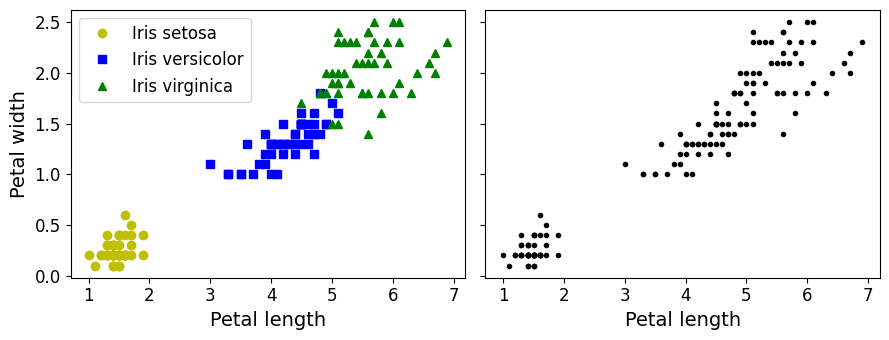

In [3]:
# ==========================================
# CLASIFICACIÓN VS CLUSTERING
# ==========================================

# Creamos una figura con dos subgráficos lado a lado
plt.figure(figsize=(9, 3.5))

# SUBGRÁFICO 1: Clasificación (aprendizaje supervisado)
# Conocemos las etiquetas (especies) de cada flor
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")       # Círculos amarillos
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")   # Cuadrados azules
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")    # Triángulos verdes
plt.xlabel("Petal length", fontsize=14)  # Longitud del pétalo
plt.ylabel("Petal width", fontsize=14)   # Anchura del pétalo
plt.legend(fontsize=12)

# SUBGRÁFICO 2: Clustering (aprendizaje no supervisado)
# No conocemos las etiquetas, todos los puntos se ven iguales
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")  # Todos los puntos en negro
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)  # Ocultamos etiquetas del eje Y

# Guardamos la figura y la mostramos
save_fig("classification_vs_clustering_plot")
plt.show();

## K-means 

**Documentación**: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans


**NOTA**: En problemas reales, es fundamental **estandarizar o escalar los datos** antes de aplicar el algoritmo k-means

In [4]:
# ==========================================
# PRIMER EJEMPLO DE K-MEANS
# ==========================================

from sklearn.cluster import KMeans

# Definimos el número de clusters que queremos encontrar
k = 3

# Creamos el modelo K-means
# - n_clusters=k : queremos encontrar 3 grupos
# - random_state=101 : fijamos semilla para reproducibilidad
kmeans = KMeans(n_clusters = k, random_state = 101)

# Entrenamos el modelo y obtenemos las predicciones en un solo paso
# fit_predict() hace dos cosas:
# 1. Entrena el modelo (encuentra los centroides óptimos)
# 2. Asigna cada punto al cluster más cercano
y_pred = kmeans.fit_predict(X)

# Mostramos las etiquetas predichas
# Cada número (0, 1 o 2) representa a qué cluster pertenece cada flor
y_pred

# Nota: hay un issue conocido de memoria en scikit-learn con KMeans
# https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

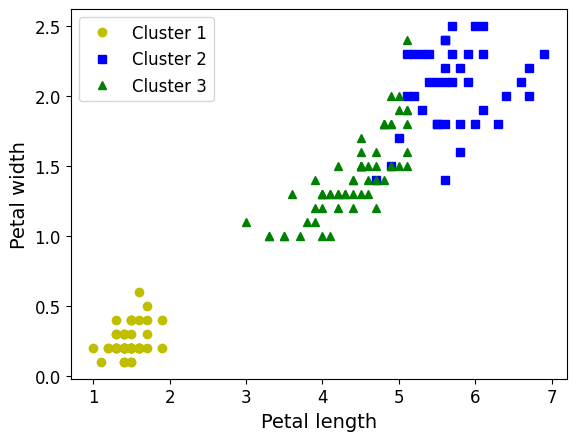

In [5]:
# ==========================================
# VISUALIZACIÓN DE LOS CLUSTERS ENCONTRADOS
# ==========================================

# Graficamos cada cluster con un color y forma diferentes
# Usamos las predicciones (y_pred) para separar los puntos por cluster

plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "yo", label="Cluster 1")  # Círculos amarillos
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "bs", label="Cluster 2")  # Cuadrados azules
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")  # Triángulos verdes

# Etiquetas de los ejes
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [6]:
# ==========================================
# GENERACIÓN DE DATASET SINTÉTICO CON BLOBS
# ==========================================

#En este contexto, los “blobs” son grupos o cúmulos de puntos de datos que se generan artificialmente para simular conjuntos de datos que presentan clustering (agrupamientos) en el espacio.
#Un blob es un conjunto de puntos que se agrupan alrededor de un centro (centroide) con cierta dispersión (desviación estándar).
#La función make_blobs de sklearn.datasets sirve precisamente para crear datos sintéticos que se distribuyen en varios grupos (clusters).

from sklearn.datasets import make_blobs


# Definimos las posiciones de los centroides de cada blob
# Cada fila [x, y] es la posición central de un grupo
blob_centroides = np.array([[0.2, 2.3],   # Centroide del blob 1
                           [-1.5, 2.3],   # Centroide del blob 2
                            [-2.8,1.8],   # Centroide del blob 3
                            [-2.8,2.8],   # Centroide del blob 4
                           [-2.8,1.3]     # Centroide del blob 5
                           ])

# Definimos la desviación estándar (dispersión) de cada blob
# Valores pequeños = blobs más concentrados
# Valores grandes = blobs más dispersos
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
# Generamos el dataset con los parámetros definidos anteriormente
X, y = make_blobs(n_samples = 2000,           # Número total de puntos
                 centers = blob_centroides,   # Posiciones de los centroides
                  cluster_std = blob_std,     # Desviación estándar de cada blob
                  random_state = 7            # Semilla para reproducibilidad
                 )

Saving figure blobs_plot


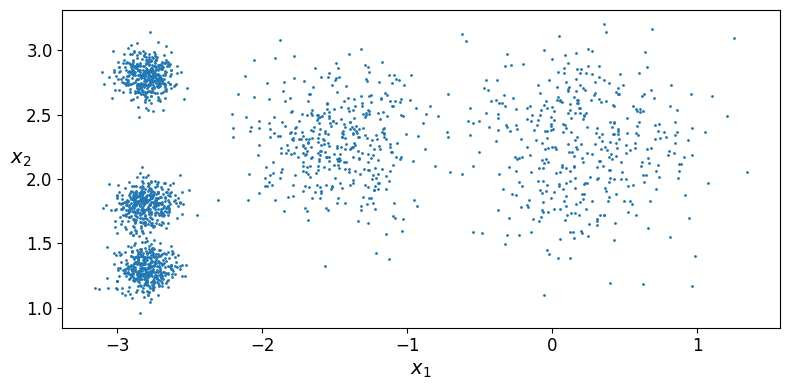

In [8]:
# Función auxiliar para visualizar clusters
def plot_clusters(X, y=None):
    """
    Crea un gráfico de dispersión de los puntos
    - X: array con las coordenadas de los puntos
    - y: (opcional) etiquetas para colorear los puntos
    """
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
# Visualizamos el dataset generado
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Interpretación del gráfico de los blobs

Este gráfico muestra los conjuntos de puntos (blobs) generados con la función `make_blobs` de `sklearn.datasets`.

- Cada punto azul representa una muestra del conjunto de datos sintético.
- Los ejes **x₁** y **x₂** son las dos características (coordenadas) de los puntos generados.
- Los puntos se agrupan en nubes o cúmulos llamados *blobs*.

#### Qué estás viendo
- Hay cinco grupos (blobs) en total, porque así se definieron en los centroides.
- Los grupos que aparecen a la izquierda están muy compactos: tienen una desviación estándar pequeña (0.1).
- Los grupos más al centro y a la derecha están más dispersos: tienen desviaciones estándar mayores (0.3 y 0.4).
- Cada grupo se genera alrededor de un punto central o centroide definido manualmente.

#### En resumen
- Cada conjunto de puntos azules es un blob.
- Su posición depende del centroide que definiste.
- Su densidad o tamaño depende del valor de la desviación estándar (`blob_std`) asignado a ese blob.
- Este tipo de datos se utiliza para practicar algoritmos de agrupamiento (*clustering*) como *K-Means*.


Entrenamos un k-means con los datos anteriores

In [9]:
# ==========================================
# ENTRENAMIENTO DE K-MEANS CON 5 CLUSTERS
# ==========================================

k = 5  # Número de clusters que queremos encontrar

# Creamos y entrenamos el modelo K-means
kmeans = KMeans(n_clusters = k,      # 5 clusters
                random_state= 47)     # Semilla para reproducibilidad

# Entrenamos y obtenemos las predicciones
y_pred = kmeans.fit_predict(X)
y_pred  # Muestra la etiqueta de cluster para cada punto

array([0, 0, 4, ..., 2, 1, 0], shape=(2000,), dtype=int32)

In [10]:
# ==========================================
# PREDICCIONES SOBRE NUEVOS PUNTOS
# ==========================================

# Una vez entrenado el modelo, podemos predecir
# a qué cluster pertenecerían nuevos puntos

# Predicción de dos puntos nuevos:
# Punto 1: [-2, 5]
# Punto 2: [1, 1]
kmeans.predict([[-2,5],[1,1]])

# El resultado indica el cluster asignado (0, 1, 2, 3 o 4)

array([2, 4], dtype=int32)

In [11]:
# ==========================================
# VISUALIZACIÓN DE LOS CENTROIDES
# ==========================================

#Un centroide es el punto central o promedio de un grupo de datos.

#En el contexto de los blobs o del clustering (agrupamiento), el centroide representa la posición alrededor de la cual se agrupan los puntos.

# El atributo cluster_centers_ contiene las coordenadas
# de los centroides encontrados por el algoritmo

kmeans.cluster_centers_

# Cada fila es un centroide [x1, x2]
# Tenemos 5 centroides porque k=5

array([[-2.80214068,  1.55162671],
       [ 0.0664876 ,  2.57279976],
       [-2.79290307,  2.79641063],
       [-1.47083264,  2.28276928],
       [ 0.3296802 ,  1.97317575]])

In [12]:
# Predicción de varios puntos a la vez
X_new = np.array([[0, 2],      # Punto 1
                  [3, 2],      # Punto 2
                 [-3, 3],      # Punto 3
                  [-3, 2.5]    # Punto 4
                 ])

# Predecimos a qué cluster pertenece cada punto
kmeans.predict(X_new)

array([4, 4, 2, 2], dtype=int32)

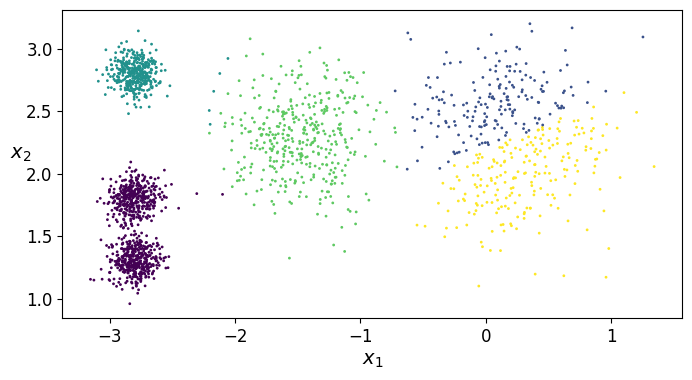

In [13]:
# Visualizamos los datos coloreados según el cluster asignado
plt.figure(figsize=(8,4))
plot_clusters(X, y = kmeans.predict(X))  # Los colores indican el cluster
plt.show()

### Interpretación visual del gráfico

El gráfico muestra cinco grupos de puntos (blobs) generados con `make_blobs`, cada uno representado con un color distinto.  
Cada color indica un **cluster identificado por el modelo K-Means**, y los puntos de un mismo color están agrupados alrededor de su **centroide**.

Los tres grupos ubicados a la izquierda son **más compactos**, ya que fueron generados con una desviación estándar pequeña, lo que produce cúmulos de puntos muy concentrados.  
En cambio, los grupos del centro y la derecha son **más dispersos**, porque su desviación estándar es mayor, haciendo que los puntos se distribuyan más ampliamente.

Visualmente, el gráfico ilustra cómo el algoritmo de **clustering** agrupa puntos similares en regiones distintas del espacio y cómo cada grupo se distingue claramente por su color.  
Los centroides (no visibles en la imagen) se ubican aproximadamente en el centro de cada conjunto de puntos y sirven como referencia para asignar nuevos datos al cluster más cercano.


Podemos pintar las regiones de decisión (diagrama de Voronoi)

In [14]:
# ==========================================
# FUNCIONES PARA VISUALIZAR DIAGRAMAS DE VORONOI
# ==========================================

#Un diagrama de Voronoi es una forma de dividir el espacio en regiones según la proximidad a un conjunto de puntos centrales, llamados centroides o sitios.


def plot_data(X):
    """Dibuja los puntos de datos"""
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    """
    Dibuja los centroides como círculos con una X en el centro
    - weights: si se especifica, solo dibuja centroides con peso significativo
    """
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    """
    Dibuja el diagrama de Voronoi (regiones de decisión)
    - clusterer: modelo de clustering entrenado
    - X: datos
    - resolution: calidad de la visualización (más = mejor pero más lento)
    """
    # Calculamos los límites del gráfico
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    # Creamos una malla de puntos para evaluar el modelo
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Predecimos el cluster para cada punto de la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujamos las regiones de color (cada color = un cluster)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # Dibujamos las líneas de frontera entre clusters
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    # Dibujamos los puntos de datos
    plot_data(X)
    
    # Dibujamos los centroides si se solicita
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Configuración de etiquetas de ejes
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


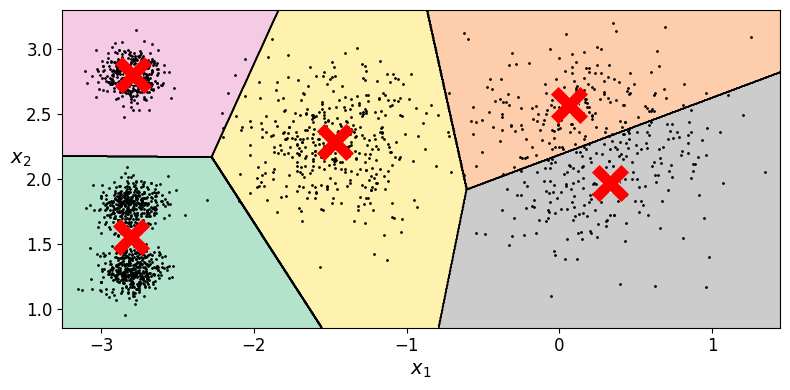

In [15]:
# Dibujamos el diagrama de Voronoi
# Cada región de color muestra qué puntos pertenecen a cada cluster
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

### Interpretación visual del diagrama de Voronoi y los clusters

El gráfico muestra los datos generados con `make_blobs` (los puntos negros) junto con las regiones formadas por el **diagrama de Voronoi** (las áreas coloreadas) y los **centroides** del modelo K-Means (las cruces rojas).

Cada color representa una **región de Voronoi**, es decir, el conjunto de puntos que están más cerca de un determinado centroide que de cualquier otro.  
Las **fronteras** entre las regiones marcan los límites donde la distancia a dos centroides es igual. En otras palabras, si un nuevo punto cayera sobre una línea divisoria, estaría exactamente a la misma distancia de dos clusters distintos.

Los **puntos negros** corresponden a las muestras originales (los blobs generados).  
Se puede observar que cada grupo de puntos queda contenido dentro de su región de color, lo cual indica que el algoritmo K-Means ha identificado correctamente los clusters.

En resumen:
- Las **cruces rojas** son los centroides aprendidos por K-Means.  
- Las **regiones coloreadas** son las **celdas de Voronoi**, que delimitan el espacio de influencia de cada centroide.  
- Los **puntos negros** son los datos originales asignados al cluster más cercano.  

Este gráfico ilustra cómo K-Means divide el espacio de características según la distancia a los centroides y cómo el diagrama de Voronoi representa visualmente esa partición del espacio.


El método `transform` Mide la distancia a cada uno de los centroides

In [16]:
# Recordemos los puntos nuevos que definimos antes
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [17]:
# ==========================================
# MÉTODO TRANSFORM: DISTANCIAS A LOS CENTROIDES
# ==========================================

# El método transform() calcula la distancia de cada punto
# a TODOS los centroides (no solo al más cercano)

kmeans.transform(X_new)

# Resultado: matriz de 4 filas (4 puntos) x 5 columnas (5 centroides)
# Cada valor es la distancia euclidiana del punto al centroide
# La columna con el valor más pequeño indica el cluster asignado

array([[2.83778629, 0.57664561, 2.9042344 , 1.49776738, 0.33076967],
       [5.81943941, 2.98891194, 5.84739223, 4.47976595, 2.67045453],
       [1.4618254 , 3.09610178, 0.29040966, 1.68901531, 3.48441362],
       [0.96879317, 3.06735163, 0.36159148, 1.54451999, 3.37109982]])

### Interpretación fila por fila del resultado de `kmeans.transform(X_new)`

Cada fila del arreglo representa un punto nuevo y muestra sus distancias a los cinco centroides del modelo.  
El valor más pequeño en cada fila indica el centroide más cercano, y por tanto, el **cluster asignado**.

| Punto (`X_new`) | Distancias a los 5 centroides | Centroide más cercano | Cluster asignado |
|-----------------|--------------------------------|-----------------------|------------------|
| `[0, 2]`        | [2.84, 0.58, 2.90, 1.50, 0.33] | El más pequeño es **0.33 → columna 5** | **Cluster 5** |
| `[3, 2]`        | [5.82, 2.99, 5.85, 4.48, 2.67] | **2.67 → columna 5** | **Cluster 5** |
| `[-3, 3]`       | [1.46, 3.10, 0.29, 1.69, 3.48] | **0.29 → columna 3** | **Cluster 3** |
| `[-3, 2.5]`     | [0.97, 3.07, 0.36, 1.54, 3.37] | **0.36 → columna 3** | **Cluster 3** |

En resumen, los puntos `[0, 2]` y `[3, 2]` pertenecen al **cluster 5**, mientras que los puntos `[-3, 3]` y `[-3, 2.5]` pertenecen al **cluster 3**.

(Los índices dependen del orden en que K-Means guardó los centroides, pero la lógica es la misma.)


In [18]:
# Comparamos con las predicciones
# El cluster asignado corresponde al centroide más cercano
kmeans.predict(X_new)

array([4, 4, 2, 2], dtype=int32)

### Relación entre la tabla anterior y el resultado de `kmeans.predict(X_new)`

A primera vista, los resultados pueden parecer distintos:

- En la tabla interpretada a mano, los puntos `[0, 2]` y `[3, 2]` se asignaron al **cluster 5**, mientras que `[-3, 3]` y `[-3, 2.5]` se asignaron al **cluster 3**.  
- En cambio, `kmeans.predict(X_new)` devuelve el siguiente resultado:

    array([4, 4, 2, 2], dtype=int32)

Esto **no representa una diferencia real en los grupos**, sino una cuestión de **indexación interna** del modelo K-Means.

K-Means numera los clusters desde **0** hasta **n_clusters - 1** según el orden en que los centroides se crean durante el entrenamiento.  
Por tanto:
- El **cluster 5** de nuestra tabla manual corresponde al **índice 4** en el modelo (`cluster 5 → índice 4`).
- El **cluster 3** de la tabla corresponde al **índice 2** (`cluster 3 → índice 2`).

En otras palabras, los resultados son **idénticos en significado**, solo difieren en el número asignado al cluster.

| Interpretación manual | Índice interno de K-Means | Equivalencia |
|-----------------------|----------------------------|--------------|
| Cluster 5 | 4 | Son el mismo grupo |
| Cluster 3 | 2 | Son el mismo grupo |

Por tanto, **la tabla y el resultado del modelo coinciden perfectamente**: ambos indican que `[0, 2]` y `[3, 2]` pertenecen al mismo cluster, y que `[-3, 3]` y `[-3, 2.5]` pertenecen a otro cluster distinto.


--

**Do it yourself**: Calcula la distancia euclídea de cada punto de `X_new` a cada centroide

In [19]:
# ==========================================
# EJERCICIO: CÁLCULO MANUAL DE DISTANCIAS
# ==========================================

# Calculamos manualmente las distancias euclidianas
# para verificar que coinciden con transform()

for p in X_new:  # Para cada punto nuevo
    for c in kmeans.cluster_centers_:  # Para cada centroide
        # Fórmula de distancia euclidiana: sqrt((x1-x2)² + (y1-y2)²)
        d = np.sqrt((p[0]-c[0])**2+(p[1]-c[1])**2)
        print(d)
    print('\n')  # Separador entre puntos

2.8377862856970264
0.5766456120726305
2.904234396532138
1.4977673755552627
0.3307696699964257


5.819439413728679
2.9889119369748793
5.847392225305731
4.479765946227203
2.6704545256904018


1.4618253982254086
3.096101781885358
0.29040966380828565
1.6890153139683208
3.4844136191694064


0.9687931697267296
3.0673516264562823
0.3615914796203903
1.544519993460428
3.371099823859565




### Inertia 

Uno de los parámetros de kmeans era el número de ejecuciones del algoritmo (`n_init`). Para seleccionar el mejor modelo, necesitamos evaluar el desempeño de cada uno. Al no tener variable objetivo, lo único que podemos medir es la suma de las distancias entre cada punto y su centroide (métrica de inercia). El algoritmo con menor inercia será el elegido


In [20]:
# ==========================================
# INERCIA (INERTIA)
# ==========================================

# La inercia mide la "compactación" de los clusters
# Es la suma de las distancias al cuadrado de cada punto a su centroide
# Cuanto MENOR sea, mejor (clusters más compactos)

kmeans.inertia_

219.44945387460797

**Do it yourself**: Usando `kmeans.transform(X)` y `kmeans.labels_` comprueba que la inercia es la suma de las distancias al cuadrado de cada punto a su centroide

In [21]:
# Veamos las distancias de todos los puntos a todos los centroides
kmeans.transform(X)

array([[0.23085922, 3.0249055 , 1.45402521, 1.54436296, 3.09229873],
       [0.26810747, 3.03845685, 0.99002955, 1.48131641, 3.20844301],
       [3.78216716, 1.66321323, 4.09069201, 2.67393196, 1.02108571],
       ...,
       [1.17785478, 2.87379739, 0.06769209, 1.40510347, 3.22271703],
       [3.15905017, 0.24456166, 3.05913478, 1.71548744, 0.43703567],
       [0.43658314, 2.77396025, 0.85434589, 1.21206498, 2.96780637]],
      shape=(2000, 5))

In [22]:
# Veamos a qué cluster pertenece cada punto
# labels_ contiene la etiqueta asignada a cada punto del dataset
kmeans.labels_

array([0, 0, 4, ..., 2, 1, 0], shape=(2000,), dtype=int32)

In [23]:
# ==========================================
# EJERCICIO: CÁLCULO MANUAL DE LA INERCIA
# ==========================================

# Vamos a calcular manualmente la inercia para verificar el resultado

iner = 0  # Inicializamos la inercia

for k in range(0, len(kmeans.labels_)):  # Para cada punto
    # Distancias del punto a todos los centroides
    dist = kmeans.transform(X)[k]  
    
    # Cluster al que pertenece el punto
    centroide = kmeans.labels_[k]  
    
    # Sumamos el cuadrado de la distancia al centroide asignado
    iner += dist[centroide]**2  

# El resultado debe coincidir con kmeans.inertia_
iner

np.float64(219.44945387460726)

El método `score()` devuelve el negativo de la inercia. ¿Por qué negativo? Porque se respeta la regla "_cuanto mayor, mejor_" de sklearn 


In [24]:
# ==========================================
# MÉTODO SCORE()
# ==========================================

# El método score() devuelve el NEGATIVO de la inercia
# ¿Por qué negativo? Para seguir la convención de sklearn:
# "cuanto mayor, mejor"

# Con inercia: menor = mejor
# Con score: mayor = mejor (por eso se invierte el signo)

kmeans.score(X)

-219.44945387460797

### Buscando el número óptimo de clusters

In [25]:
# ==========================================
# FUNCIÓN PARA COMPARAR DOS MODELOS K-MEANS
# ==========================================

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    """
    Compara visualmente dos modelos de clustering lado a lado
    """
    # Entrenamos ambos modelos
    clusterer1.fit(X)
    clusterer2.fit(X)

    # Creamos figura con dos subgráficos
    plt.figure(figsize=(10, 3.2))

    # Primer modelo
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    # Segundo modelo
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [26]:
# Creamos dos modelos con diferentes valores de k
kmeans_k3 = KMeans(n_clusters = 3, random_state = 42)  # 3 clusters
kmeans_k8 = KMeans(n_clusters=8, random_state=42)      # 8 clusters

Saving figure bad_n_clusters_plot


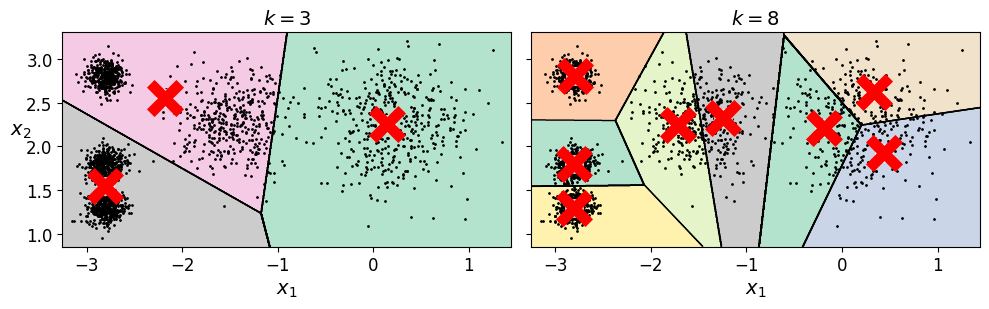

In [27]:
# Comparamos visualmente k=3 vs k=8
# Con k=3 parece haber muy pocos clusters
# Con k=8 parece haber demasiados (overfitting)
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [28]:
# Miramos la inercia del modelo con k=3
# Mayor inercia = clusters más dispersos
kmeans_k3.inertia_

653.2167190021553

In [29]:
# Miramos la inercia del modelo con k=8
# Menor inercia = clusters más compactos
# Pero ¿es realmente mejor? ¡No siempre!
kmeans_k8.inertia_

127.13141880461839

Para elegir el número óptimo de clusters, **no** podemos simplemente elegir el valor de *k* que minimice la inercia, porque ésta va disminuyendo a medida que incrementamos *k*. Podemos hacer un plot de la inercia en función de *k* y analizar la curva

In [30]:
# ==========================================
# MÉTODO DEL CODO: PROBAMOS DIFERENTES VALORES DE K
# ==========================================

# Entrenamos modelos con k desde 2 hasta 9
# List comprehension que entrena cada modelo
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) 
                for k in range(2,10)]

# Extraemos la inercia de cada modelo
inertias = [model.inertia_ for model in kmeans_per_k]

# Mostramos las inercias
# Observa cómo disminuyen a medida que aumenta k
inertias

[1149.8913501507034,
 653.2167190021552,
 261.79677785694696,
 224.07433122515727,
 173.8760906263787,
 141.79723757580348,
 127.13141880461838,
 109.89175716631655]

Saving figure inertia_vs_k_plot


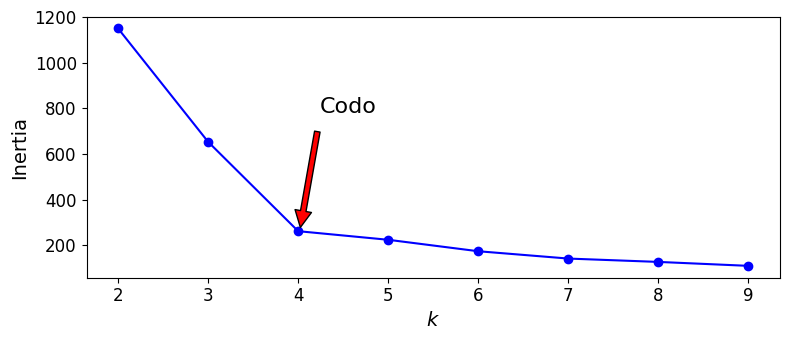

In [31]:
# ==========================================
# GRÁFICO DEL MÉTODO DEL CODO
# ==========================================

plt.figure(figsize=(8, 3.5))

# Graficamos inercia vs número de clusters
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# Añadimos anotación señalando el "codo"
# El codo es el punto donde la inercia deja de disminuir significativamente
# En este caso, el codo está en k=4
plt.annotate('Codo',
             xy=(4, inertias[3]),          # Posición del codo
             xytext=(0.4, 0.65),           # Posición del texto
             textcoords='figure fraction',  # Coordenadas relativas
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )

save_fig("inertia_vs_k_plot")
plt.show()

In [32]:
# Basándonos en el método del codo, probamos k=4 y k=5
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
kmeans_k5 = KMeans(n_clusters=5, random_state=42)

Saving figure k4_k5_comparison


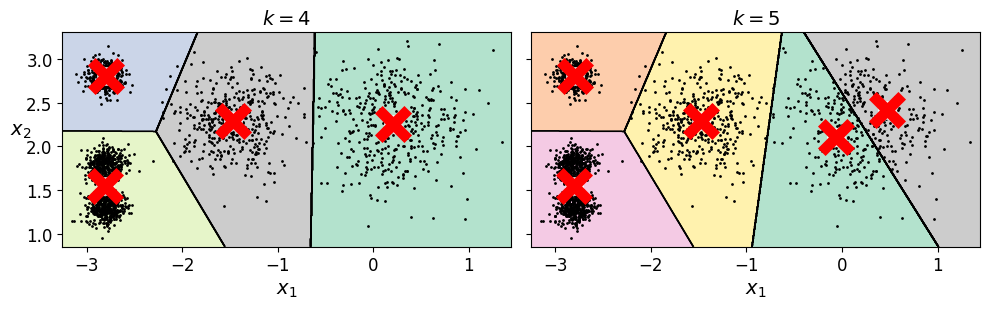

In [33]:
# Comparamos visualmente k=4 vs k=5
# Ambos parecen buenas opciones
# k=5 identifica mejor los 5 blobs originales
plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
save_fig("k4_k5_comparison")
plt.show()

Otra forma de elegir el número de clusters es mediante el *silhouette score*, que consiste en la media de los coeficientes *silhouette* sobre todos los puntos. Este coeficiente se calcula como $(b-a)/\max(a,b)$, siendo $a$ la distancia media de los puntos en el mismo cluster (distancia intra-cluster), y $b$ la distancia media al cluster más cercano 

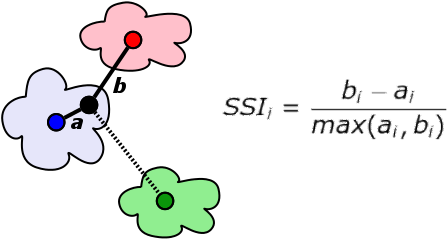

Este coeficiente varía entre -1 y 1. Cuanto más próximo sea a +1 quiere decir que el punto está bien situado dentro de su cluster y está alejado de otros clusters. 

Un coeficiente igual a 0 indica que está cercano a una frontera entre clusters, y un coeficiente igual a -1 indica que el punto puede haber sido asignado a un cluster erróneo

In [34]:
# ==========================================
# COEFICIENTE DE SILHOUETTE
# ==========================================

from sklearn.metrics import silhouette_score

In [35]:
# Calculamos el silhouette score del modelo actual (k=5)
# El coeficiente de silhouette mide:
# - Qué tan cerca están los puntos de su propio cluster (cohesión)
# - Qué tan lejos están de otros clusters (separación)
# Valores cercanos a 1 = excelente
# Valores cercanos a 0 = clusters superpuestos
# Valores negativos = puntos mal asignados
silhouette_score(X, kmeans.labels_)

0.6350091488727606

In [36]:
# Calculamos el silhouette score para todos los valores de k
# Esto nos ayuda a elegir el mejor k
silhouette_scores = [silhouette_score(X, model.labels_) 
                     for model in kmeans_per_k]
silhouette_scores

[0.5953628624305034,
 0.5723900247411775,
 0.688531617595759,
 0.6267891051050735,
 0.5939826924531691,
 0.6073764342983768,
 0.5458573941676348,
 0.553632752836704]

Saving figure silhouette_score_vs_k_plot


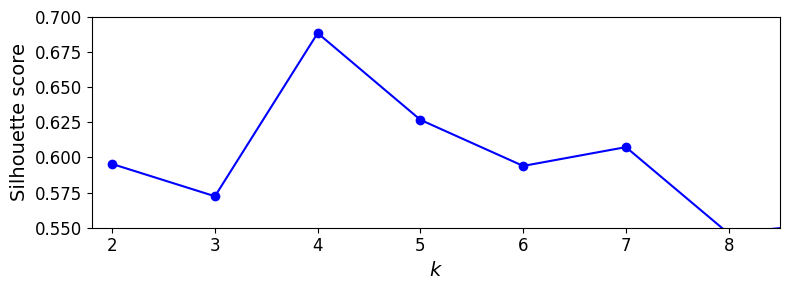

In [37]:
# ==========================================
# GRÁFICO DE SILHOUETTE SCORE VS K
# ==========================================

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

# El valor máximo está en k=4, confirmando nuestra elección
# k=5 también es buena opción (segundo mejor)

save_fig("silhouette_score_vs_k_plot")
plt.show()

Esta visualización aporta más información que la anterior. Se confirma que $k=4$ es muy buena opción, también indica que $k=5$ es también buena.  

Existen también los diagramas de siluetas, donde el eje *y* representa cada cluster y el eje *x* es el coeficiente de silhouette. La anchura de cada "cuchillo" indica el número de puntos en cada cluster, y el contorno del "cuchillo" son los puntos con diferentes coeficientes. Hay que buscar cuchillos poco afilados, homogéneos y que superen la media del coeficiente


Saving figure silhouette_analysis_plot


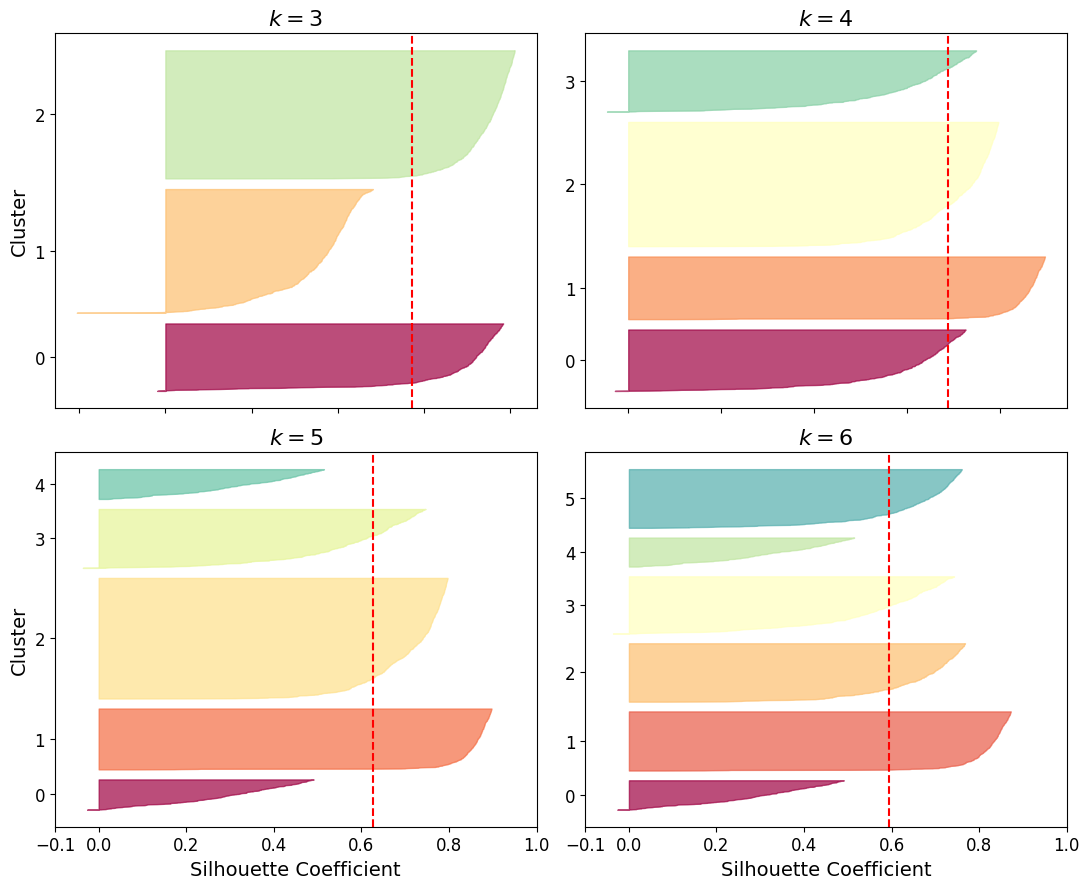

In [38]:
# ==========================================
# DIAGRAMAS DE SILUETA (SILHOUETTE PLOTS)
# ==========================================

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Estos diagramas muestran el coeficiente de silhouette de cada punto
# Cada "cuchillo" representa un cluster
# Ancho del cuchillo = número de puntos en el cluster
# Forma del cuchillo = distribución de coeficientes

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    # Obtenemos las predicciones del modelo
    y_pred = kmeans_per_k[k - 2].labels_
    
    # Calculamos el coeficiente de silhouette de cada punto
    silhouette_coefficients = silhouette_samples(X, y_pred)

    # Configuración para el espaciado entre clusters
    padding = len(X) // 30
    pos = padding
    ticks = []
    
    # Dibujamos cada cluster
    for i in range(k):
        # Coeficientes del cluster i, ordenados
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        # Color único para cada cluster
        color = mpl.cm.Spectral(i / k)
        
        # Dibujamos el "cuchillo" del cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Guardamos posición para la etiqueta
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configuramos las etiquetas del eje Y (números de cluster)
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Línea roja vertical = media del silhouette score
    # Clusters que no llegan a esta línea son débiles
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Interpretación del gráfico de Silhouette para diferentes valores de *k*

El gráfico muestra la **evaluación de la calidad de los clusters** generados por el algoritmo **K-Means** utilizando el **coeficiente de silueta** (*Silhouette Coefficient*), para diferentes valores de *k* (número de clusters).

Cada subgráfico corresponde a un valor de *k*:
- *k = 3*
- *k = 4*
- *k = 5*
- *k = 6*

#### Qué representa cada elemento:
- Cada **forma de color** corresponde a un **cluster**.
- El **ancho** de cada forma representa el valor del **coeficiente de silueta** de los puntos que pertenecen a ese cluster.
- La **línea roja discontinua** muestra el **promedio global del coeficiente de silueta** para ese valor de *k*.

#### Interpretación:
- El **coeficiente de silueta** mide qué tan bien separado y compacto está cada cluster:
  - Valores cercanos a **1** → los puntos están bien agrupados y lejos de otros clusters.
  - Valores cercanos a **0** → los puntos están en el límite entre dos clusters.
  - Valores negativos → los puntos pueden estar mal asignados.

#### Comparación entre los valores de *k*:
- Al aumentar *k*, los clusters se dividen en grupos más pequeños.
- El valor promedio de silueta (línea roja) indica qué número de *k* produce una **mejor separación entre grupos**.
- En este gráfico, el valor promedio de silueta **más alto** parece estar alrededor de *k = 4* o *k = 5*, lo que sugiere que esos valores generan una **buena estructura de agrupamiento** sin sobresegmentar los datos.

#### Conclusión:
El gráfico permite **visualizar y comparar la calidad del agrupamiento** para distintos números de clusters.  
El mejor valor de *k* será aquel con el **mayor promedio de silueta** y clusters bien definidos (anchos y separados).


### Limitaciones de Kmeans

Cuando tenemos los puntos muy concentrados y con formas no concéntricas, el algoritmo de k-means puede no funcionar bien

In [39]:
# ==========================================
# LIMITACIONES DE K-MEANS: DATASET CON FORMAS COMPLEJAS
# ==========================================

# Generamos dos grupos elípticos superpuestos
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
# Aplicamos transformación para crear formas elípticas
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

# Generamos un grupo pequeño y compacto
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]  # Desplazamos el grupo

# Combinamos los datos
X = np.r_[X1, X2]  # np.r_ concatena arrays verticalmente
y = np.r_[y1, y2]

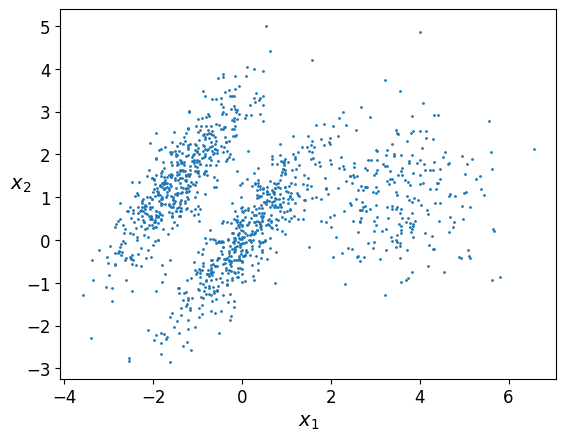

In [40]:
# Visualizamos el dataset con formas complejas
# Observa que hay 3 grupos con formas no circulares
plot_clusters(X)

In [41]:
# ==========================================
# COMPARACIÓN: BUENOS VS MALOS CENTROIDES INICIALES
# ==========================================

# Modelo con inicialización MANUAL de centroides (buena elección)
kmeans_good = KMeans(n_clusters=3,
                    # Especificamos posiciones iniciales de centroides
                    init = np.array([[-1.5, 2.5], [0.5,0], [4,0]]),
                     n_init = 1,  # Solo 1 ejecución (porque ya sabemos dónde están)
                     random_state = 42
                    )

# Modelo con inicialización ALEATORIA (puede fallar)
kmeans_bad = KMeans(n_clusters=3, random_state=42)

# Entrenamos ambos modelos
kmeans_good.fit(X)
kmeans_bad.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Saving figure bad_kmeans_plot


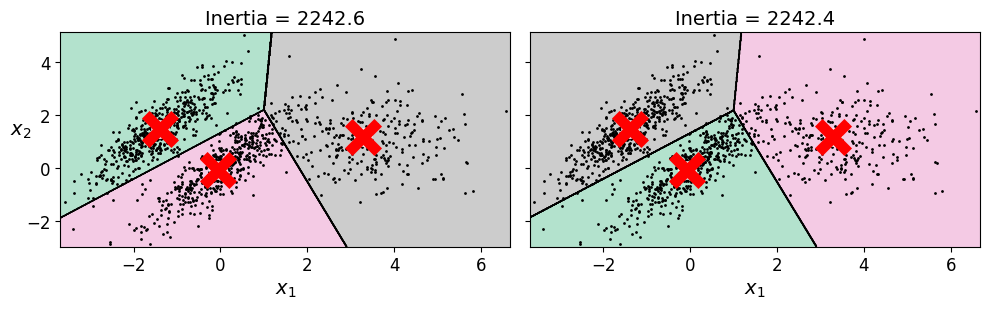

In [42]:
# Comparamos ambos modelos visualmente

plt.figure(figsize=(10, 3.2))

# Modelo con buenos centroides iniciales
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

# Modelo con malos centroides iniciales
plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

# OBSERVACIÓN IMPORTANTE:
# A pesar de tener MAYOR inercia, el modelo "good" agrupa mejor
# K-means asume clusters circulares/esféricos
# Para formas complejas, necesitamos otros algoritmos (como DBSCAN)

save_fig("bad_kmeans_plot")
plt.show()

### Comparación entre buenas y malas inicializaciones de centroides en K-Means

El gráfico muestra cómo el algoritmo **K-Means** puede producir diferentes resultados dependiendo de los **puntos iniciales elegidos como centroides**.

Cada panel representa una ejecución distinta del algoritmo con el mismo conjunto de datos:

- **Izquierda:** inicialización *manual* con buenos centroides (`init` definido por el usuario).  
- **Derecha:** inicialización *aleatoria* (`init="random"`, valor por defecto).

#### Elementos del gráfico
- Los **puntos negros** representan las observaciones del conjunto de datos.  
- Las **áreas coloreadas** muestran las regiones asignadas a cada cluster (las *fronteras de decisión*).  
- Las **cruces rojas** indican la posición final de los **centroides**.  
- El valor de **Inertia** en el título representa la suma de las distancias cuadradas de los puntos a su centroide correspondiente (una medida del ajuste del modelo).

#### Interpretación
- Ambos modelos tienen valores de inercia similares (`2242.6` y `2242.4`), lo que significa que ambos lograron un agrupamiento comparable en términos de distancia total.  
- Sin embargo, el modelo con **buena inicialización (izquierda)** genera clusters **más coherentes y alineados con la estructura real de los datos**.  
- El modelo con **inicialización aleatoria (derecha)** puede producir límites de decisión menos naturales o intercambiar los clusters, aunque la inercia no cambie mucho.

#### Conclusión
La inicialización de los centroides influye significativamente en el resultado de K-Means:
- Una **buena elección inicial** acelera la convergencia y mejora la estabilidad del modelo.  
- Una **mala inicialización** puede llevar a soluciones subóptimas o a resultados inconsistentes entre ejecuciones.  




## DBSCAN

In [43]:
# ==========================================
# DBSCAN: ALGORITMO DE CLUSTERING BASADO EN DENSIDAD
# ==========================================

import numpy as np

In [44]:
# Importamos la función para generar datasets con forma de lunas
from sklearn.datasets import make_moons

In [45]:
# Generamos un dataset con forma de dos medias lunas
# Este tipo de forma NO funciona bien con K-means
X, y = make_moons(n_samples=1000,    # 1000 puntos en total
                  noise=0.05,        # Pequeña cantidad de ruido
                  random_state=42)   # Reproducibilidad

In [46]:
# Importamos el algoritmo DBSCAN
from sklearn.cluster import DBSCAN

In [47]:
# ==========================================
# PRIMER MODELO DBSCAN
# ==========================================

# DBSCAN tiene dos hiperparámetros principales:
# - eps: radio máximo de vecindad (epsilon)
# - min_samples: mínimo de puntos para formar un cluster denso

dbscan = DBSCAN(eps=0.05,        # Radio pequeño = clusters muy densos
                min_samples = 5)  # Mínimo 5 puntos para ser un núcleo
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [48]:
# Analizamos los resultados del modelo

print(X.shape)  # Tamaño del dataset: (1000, 2)

# core_sample_indices_ contiene los índices de los puntos "core"
# (puntos con suficientes vecinos)
print(len(dbscan.core_sample_indices_))  

# labels_ contiene la etiqueta de cluster de cada punto
# -1 = ruido/outlier, 0,1,2,... = clusters
print(np.unique(dbscan.labels_))  

# components_ contiene las coordenadas de los puntos core
print(dbscan.components_)  

# Con eps=0.05 muy pequeño, encontró 8 clusters (demasiados!)

(1000, 2)
808
[-1  0  1  2  3  4  5  6]
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


### Interpretación de los resultados del modelo DBSCAN

El resultado corresponde al análisis del modelo **DBSCAN** aplicado a un conjunto de datos bidimensional con 1000 observaciones. El objetivo es entender cómo el algoritmo ha identificado los puntos núcleo, los clusters y el ruido.

El tamaño del dataset `(1000, 2)` indica que hay 1000 puntos y 2 características (por ejemplo, coordenadas `x₁` y `x₂`).

El valor `808` en `len(dbscan.core_sample_indices_)` significa que 808 puntos fueron clasificados como **puntos núcleo**, es decir, aquellos que tienen suficientes vecinos dentro del radio `eps` definido. Estos puntos forman el corazón de los clusters detectados.

El resultado de `np.unique(dbscan.labels_) = [-1  0  1  2  3  4  5  6]` muestra que el modelo encontró **8 etiquetas distintas**:  
7 corresponden a **clusters reales** (del 0 al 6) y 1 corresponde al **ruido** (`-1`), que agrupa los puntos considerados atípicos o aislados.  
Esto indica que con `eps=0.05` el algoritmo fue demasiado estricto, separando el conjunto de datos en demasiados grupos pequeños.

Finalmente, `dbscan.components_` contiene las **coordenadas de los puntos núcleo** que forman la estructura central de cada cluster. Cada fila de esta matriz representa un punto considerado parte fundamental de algún grupo.

En conclusión, con `eps=0.05` el modelo DBSCAN detectó **7 clusters válidos y un grupo de ruido**, para un total de **8 etiquetas distintas**. El valor de `eps` es demasiado pequeño, lo que genera una **sobrefragmentación** del espacio. Un valor más alto de `eps` podría producir agrupamientos más amplios y coherentes.


In [49]:
# ==========================================
# SEGUNDO MODELO DBSCAN (eps mayor)
# ==========================================

# Probamos con un radio mayor
dbscan2 = DBSCAN(eps=0.2)  # Radio 4 veces mayor que antes
dbscan2.fit(X)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [50]:
# Analizamos el segundo modelo

print(len(dbscan2.core_sample_indices_))  # Todos los puntos son core (1000)
print(np.unique(dbscan2.labels_))         # Solo 2 clusters [0, 1]

# ¡Perfecto! Identificó correctamente las dos medias lunas

1000
[0 1]


In [51]:
# ==========================================
# FUNCIÓN PARA VISUALIZAR DBSCAN
# ==========================================

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    """
    Visualiza los resultados de DBSCAN
    - Core points: círculos grandes con estrella en el centro
    - Border points: círculos pequeños
    - Anomalies/Noise: X rojas
    """
    # Creamos máscaras para identificar cada tipo de punto
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True  # Puntos core
    anomalies_mask = dbscan.labels_ == -1          # Anomalías (etiqueta -1)
    non_core_mask = ~(core_mask | anomalies_mask)  # Puntos frontera

    # Separamos los puntos según su tipo
    cores = dbscan.components_      # Puntos core
    anomalies = X[anomalies_mask]   # Anomalías
    non_cores = X[non_core_mask]    # Puntos frontera
    
    # Dibujamos puntos core (círculos grandes coloreados)
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    
    # Dibujamos estrella en el centro de cada punto core
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, 
                c=dbscan.labels_[core_mask])
    
    # Dibujamos anomalías (X rojas)
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    
    # Dibujamos puntos frontera (puntos pequeños)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], 
                c=dbscan.labels_[non_core_mask], marker=".")
    
    # Configuración de etiquetas
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), 
              fontsize=14)

Saving figure dbscan_plot


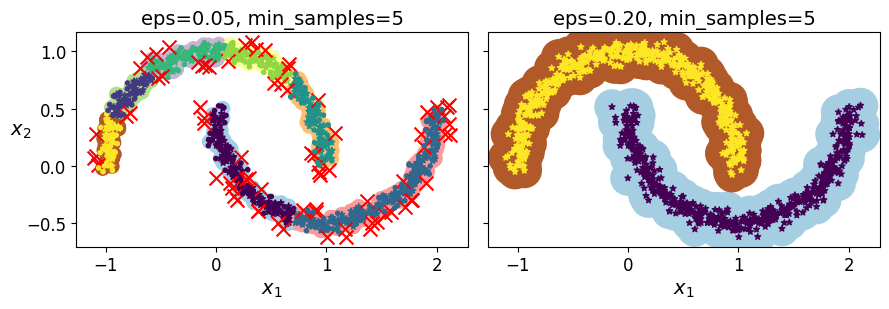

In [52]:
# Comparamos visualmente ambos modelos DBSCAN

plt.figure(figsize=(9, 3.2))

# Modelo con eps=0.05 (muy pequeño, muchos clusters)
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

# Modelo con eps=0.2 (apropiado, 2 clusters)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [53]:
# Usamos el modelo con eps=0.2 para el resto del análisis
dbscan = dbscan2

#### DBSCAN Predictions

In [54]:
# ==========================================
# PREDICCIONES CON DBSCAN (USANDO KNN)
# ==========================================

# DBSCAN no tiene método predict() nativo
# Solución: entrenar un clasificador KNN con los puntos core

from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Entrenamos un clasificador KNN con los puntos core
# Usamos 50 vecinos más cercanos para la clasificación

knn = KNeighborsClassifier(n_neighbors=50)

# Entrenamos con:
# X: coordenadas de los puntos core
# y: etiquetas de cluster de los puntos core
knn.fit(dbscan.components_, 
       dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
# Definimos nuevos puntos para predecir
X_new = np.array([[-0.5, 0],   # Punto 1
                  [0, 0.5],    # Punto 2
                  [1, -0.1],   # Punto 3
                  [2,1]        # Punto 4
                 ])

# Predecimos el cluster de cada punto nuevo usando KNN
knn.predict(X_new)

array([1, 0, 1, 0])

In [57]:
# Obtenemos las probabilidades de pertenencia a cada cluster
# Cada fila suma 1.0
# [probabilidad cluster 0, probabilidad cluster 1]
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


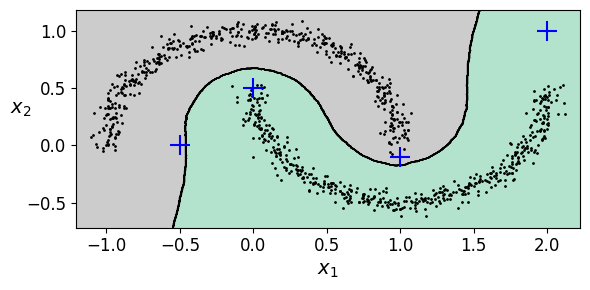

In [58]:
# Visualizamos las regiones de decisión del clasificador KNN
# Los puntos nuevos se muestran como signos "+" azules

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

### Interpretación del gráfico: Predicciones con DBSCAN usando KNN

El gráfico muestra cómo se pueden **clasificar nuevos puntos** cuando se ha entrenado un modelo **DBSCAN**, que originalmente **no tiene método `predict()`**.

Para lograrlo, se ha entrenado un **clasificador KNN (K-Nearest Neighbors)** usando los **puntos núcleo (core samples)** del modelo DBSCAN y sus etiquetas de cluster.  
De esta forma, el KNN aprende los límites de las regiones ya formadas por DBSCAN y puede asignar un cluster a puntos nuevos.

#### Qué se observa en el gráfico

- Los **puntos negros** representan las muestras originales utilizadas por DBSCAN.  
- Las **áreas coloreadas** muestran las **regiones de decisión** aprendidas por el clasificador KNN, basadas en los clusters originales detectados por DBSCAN.  
- La **línea negra** marca la frontera que separa los clusters.  
- Los **signos “+” azules** son los **nuevos puntos (`X_new`)** cuya pertenencia de cluster se predice con KNN.

#### Interpretación del resultado

- Los puntos “+” que caen en la región verde se asignan al **cluster 0**.  
- Los puntos que caen en la región gris se asignan al **cluster 1**.  
- Los bordes entre ambas regiones muestran las zonas donde el clasificador KNN tiene **incertidumbre** (probabilidades similares entre clusters).  
- Cada predicción también tiene una **probabilidad asociada** (`knn.predict_proba`), que indica el grado de pertenencia al cluster.

#### Conclusión

Como DBSCAN no puede clasificar nuevos puntos directamente, se utiliza un **clasificador auxiliar (KNN)** entrenado con los **puntos núcleo** del modelo.  
De esta manera, se extiende la funcionalidad de DBSCAN para **predecir la pertenencia de datos nuevos** a los clusters ya formados, manteniendo la estructura original detectada por densidad.


## Clustering  jerárquico

In [59]:
# ==========================================
# CLUSTERING JERÁRQUICO (HIERARCHICAL CLUSTERING)
# ==========================================

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale

In [60]:
# ==========================================
# FUNCIÓN PARA DIBUJAR DENDROGRAMAS
# ==========================================

#Un dendrograma es un gráfico en forma de árbol que se utiliza para representar el proceso de agrupamiento jerárquico (hierarchical clustering).

def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendrograma usando la función dendrogram de scipy
    
    Un dendrograma es un árbol que muestra cómo se unen los clusters
    progresivamente desde puntos individuales hasta un solo cluster
    '''
    
    # Calculamos el número de elementos en cada fusión
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Es una hoja (punto individual)
            else:
                current_count += counts[child_idx - n_samples]  # Es un cluster
        counts[i] = current_count

    # Construimos la matriz de enlace (linkage matrix) para scipy
    # Formato: [hijo1, hijo2, distancia, tamaño]
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Dibujamos el dendrograma
    dendrogram(linkage_matrix, **kwargs)

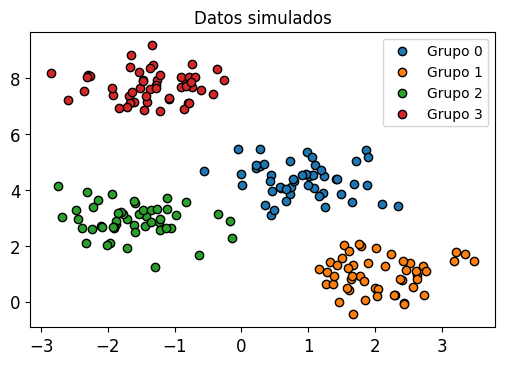

In [61]:
# ==========================================
# GENERACIÓN DE DATASET PARA CLUSTERING JERÁRQUICO
# ==========================================

from sklearn.datasets import make_blobs

# Generamos 200 puntos distribuidos en 4 clusters
X, y = make_blobs(
        n_samples    = 200,      # 200 puntos totales
        n_features   = 2,        # 2 dimensiones (x, y)
        centers      = 4,        # 4 clusters verdaderos
        cluster_std  = 0.60,     # Desviación estándar
        shuffle      = True,     # Mezclamos los datos
        random_state = 0         # Semilla para reproducibilidad
       )

# Visualizamos los datos reales (coloreados por grupo verdadero)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax.set_title('Datos simulados')
ax.legend();

Con la clase `sklearn.cluster.AgglomerativeClustering` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo hierarchical clustering aglomerativo. Entre sus parámetros destacan:

- `n_clusters`: determina el número de clusters que se van a generar. En su lugar, su valor puede ser `None` si se quiere utilizar el criterio de distancia para crear los clusters o crecer todo el dendograma.

- `distance_threshold`: distancia (altura del dendograma) a partir de la cual se dejan de unir los clusters. Indicar `distance_threshold=0` para crecer todo el árbol.

Además, el parámetro `linkage` permite escoger cómo queremos calcular la ditancia entre clusters (single, complete o average)  
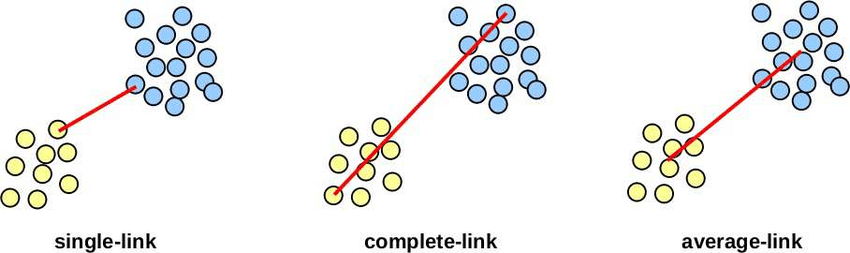

In [62]:
# ==========================================
# ENTRENAMIENTO DE CLUSTERING JERÁRQUICO COMPLETO
# ==========================================

# IMPORTANTE: Escalamos los datos antes de aplicar clustering
# Esto asegura que todas las variables tengan la misma importancia
X_scaled = scale(X)

# Entrenamos el modelo con:
# - n_clusters=None: no especificamos número de clusters
# - distance_threshold=0: crecemos el árbol completo (todos los niveles)
hclust = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hclust.fit(X_scaled)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


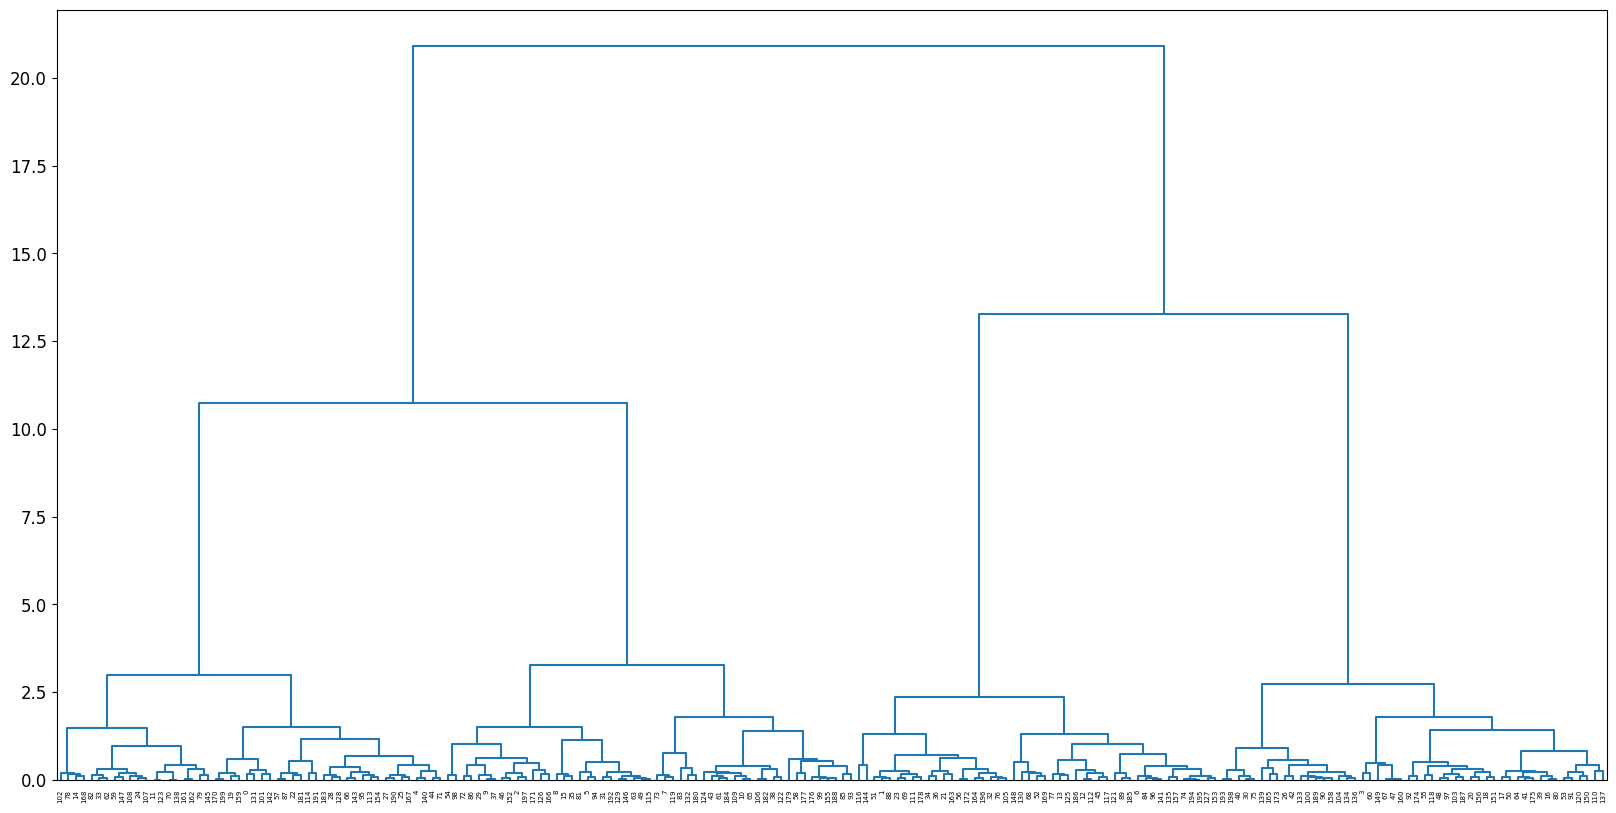

In [63]:
# Dibujamos el dendrograma completo
# Cada línea vertical muestra una fusión de clusters
# La altura indica la distancia entre los clusters fusionados
# Cuanto más alta la fusión, más diferentes son los clusters

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_dendrogram(hclust, color_threshold=0)

### Interpretación del número de clusters en el dendrograma

Una forma de identificar el número de clusters apropiado es **inspeccionar visualmente el dendrograma** y decidir a qué altura se debe **cortar el árbol** para separar los grupos.

El **punto de corte** se elige observando las uniones entre clusters (líneas horizontales):  
- Si se corta el dendrograma a una **altura baja**, se obtienen muchos clusters pequeños.  
- Si se corta a una **altura alta**, los clusters se fusionan y el número de grupos disminuye.

En este caso, al observar el dendrograma, parece razonable **cortar entre las alturas 5 y 10**, ya que en ese rango se aprecia una separación clara entre grupos principales antes de las uniones grandes.  
Con ese corte se formarían aproximadamente **4 clusters**, lo que refleja una estructura de agrupamiento equilibrada:  
los clusters son lo suficientemente separados entre sí, pero sin fragmentar demasiado los datos.


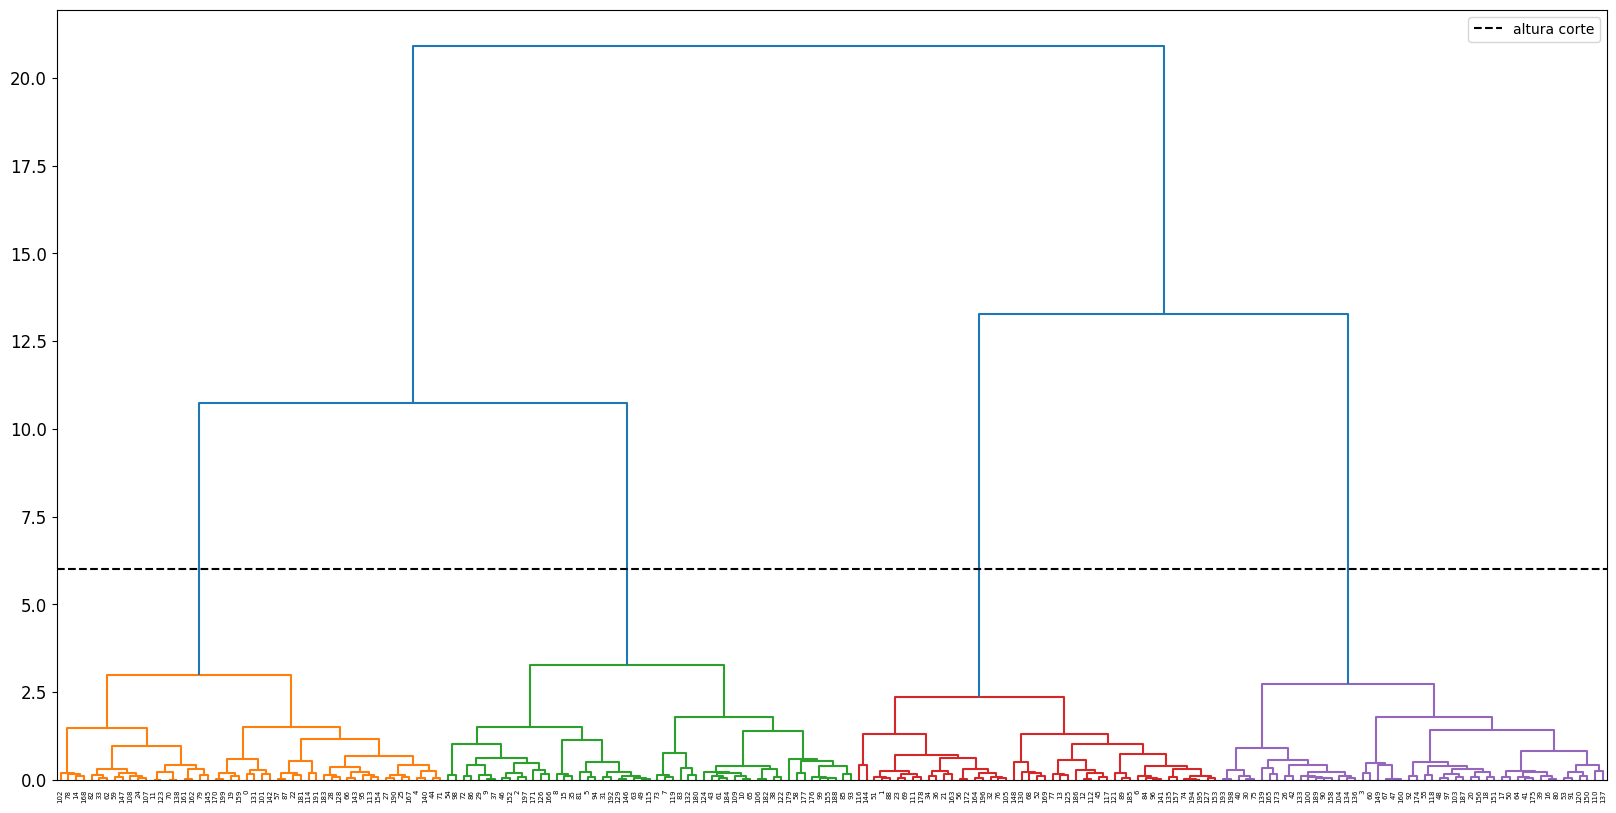

In [64]:
# ==========================================
# DENDROGRAMA CON LÍNEA DE CORTE
# ==========================================

# Elegimos una altura de corte para determinar el número de clusters
# Cortando a altura 6, creamos 4 clusters

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
altura_corte = 6

# Dibujamos el dendrograma con colores según la altura de corte
plot_dendrogram(hclust, color_threshold=altura_corte, ax=ax)

# Línea horizontal negra indica dónde cortamos el árbol
ax.axhline(y=altura_corte, c='black', linestyle='--', label='altura corte')
ax.legend();

También podemos usar el coeficiente de *silhouette*

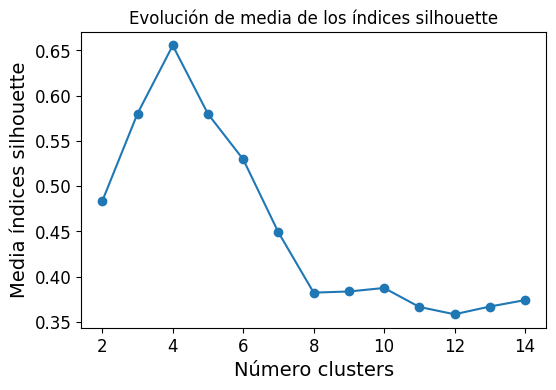

In [65]:
# ==========================================
# SELECCIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS
# USANDO SILHOUETTE SCORE
# ==========================================

range_n_clusters = range(2, 15)  # Probamos de 2 a 14 clusters
valores_medios_silhouette = []

# Para cada número de clusters
for n_clusters in range_n_clusters:
    # Entrenamos un modelo con ese número de clusters
    modelo = AgglomerativeClustering(n_clusters = n_clusters)
    
    # Obtenemos las etiquetas de cluster
    cluster_labels = modelo.fit_predict(X_scaled)
    
    # Calculamos el silhouette score promedio
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
# Graficamos la evolución del silhouette score
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Una vez identificado el número óptimo de clusters, se reentrena el modelo indicando este valor.

In [66]:
# Basándonos en el análisis anterior, entrenamos el modelo final con 4 clusters
# (el valor que maximiza el silhouette score)
modelo_hclust = AgglomerativeClustering(n_clusters=4)
modelo_hclust.fit(X_scaled)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [67]:
# Obtenemos las etiquetas de cluster para cada punto
# 0, 1, 2, 3 = identificador del cluster
modelo_hclust.fit_predict(X_scaled)

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

Text(0.5, 1.0, 'Datos clustering jerárquico')

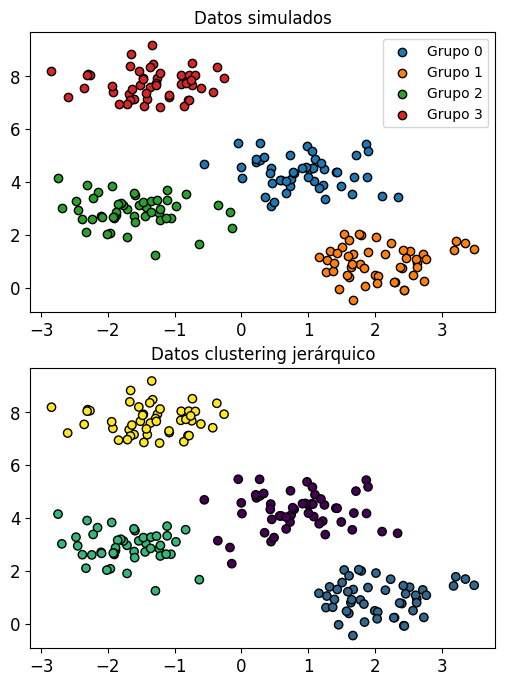

In [68]:
# ==========================================
# COMPARACIÓN: DATOS REALES VS CLUSTERING JERÁRQUICO
# ==========================================

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# GRÁFICO SUPERIOR: Datos simulados (verdad conocida)
for i in np.unique(y):
    ax[0].scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax[0].set_title('Datos simulados')
ax[0].legend();

# GRÁFICO INFERIOR: Resultado del clustering jerárquico
ax[1].scatter(X[:,0], X[:,1], 
              c=modelo_hclust.fit_predict(X_scaled),  # Colores según cluster
              edgecolor = 'black') 
ax[1].set_title('Datos clustering jerárquico')

# OBSERVACIÓN: El clustering jerárquico ha identificado correctamente los 4 grupos

In [69]:
# ==========================================
# CLUSTERING JERÁRQUICO CON UMBRAL DE DISTANCIA
# ==========================================

# En lugar de especificar el número de clusters,
# especificamos una distancia máxima para fusionar clusters

modelo_hclust2 = AgglomerativeClustering(
    n_clusters = None,           # No especificamos número de clusters
    distance_threshold=2)        # Fusionamos solo si distancia < 2

modelo_hclust2.fit(X_scaled)

# Obtenemos las etiquetas
modelo_hclust2.fit_predict(X_scaled)

array([1, 7, 4, 2, 1, 4, 3, 0, 4, 4, 0, 5, 3, 3, 5, 4, 2, 2, 2, 1, 2, 7,
       1, 7, 5, 1, 6, 1, 1, 4, 6, 4, 7, 5, 7, 4, 7, 4, 0, 2, 6, 2, 6, 0,
       1, 3, 4, 2, 2, 4, 2, 7, 3, 2, 4, 2, 7, 1, 0, 5, 2, 0, 5, 4, 2, 0,
       1, 2, 3, 7, 5, 1, 4, 0, 3, 6, 7, 3, 5, 5, 2, 4, 5, 0, 3, 0, 4, 1,
       7, 3, 6, 2, 2, 0, 4, 1, 3, 2, 4, 0, 6, 1, 5, 2, 6, 7, 0, 5, 5, 0,
       2, 7, 3, 1, 1, 4, 7, 3, 2, 0, 2, 3, 0, 5, 0, 3, 4, 3, 1, 4, 3, 1,
       0, 6, 6, 3, 6, 2, 5, 6, 1, 3, 1, 1, 7, 5, 4, 5, 3, 2, 2, 2, 4, 3,
       1, 0, 2, 3, 6, 1, 2, 5, 5, 7, 7, 6, 4, 1, 5, 3, 1, 4, 7, 6, 2, 2,
       0, 0, 7, 0, 0, 1, 0, 1, 0, 3, 3, 2, 0, 6, 1, 1, 4, 6, 3, 3, 7, 4,
       6, 1])

Text(0.5, 1.0, 'Datos clustering jerárquico distancia = 2')

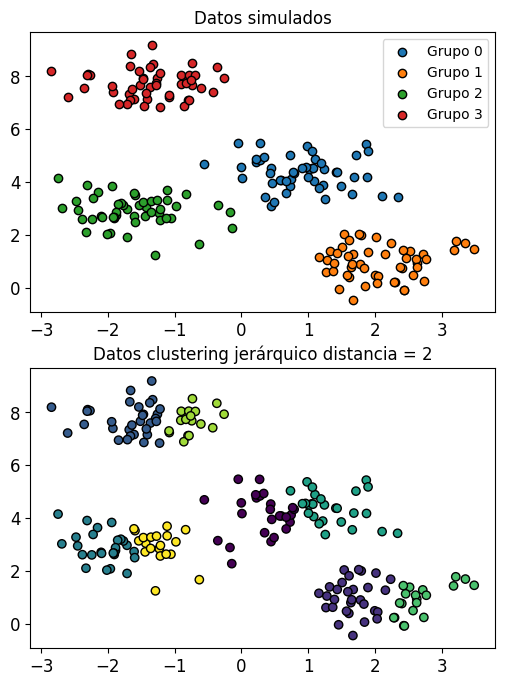

In [70]:
# Comparamos los datos reales con el clustering usando umbral de distancia

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# GRÁFICO SUPERIOR: Datos simulados (verdad conocida)
for i in np.unique(y):
    ax[0].scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax[0].set_title('Datos simulados')
ax[0].legend();

# GRÁFICO INFERIOR: Resultado con distance_threshold=2
ax[1].scatter(X[:,0], X[:,1], 
              c=modelo_hclust2.fit_predict(X_scaled),
              edgecolor = 'black') 
ax[1].set_title('Datos clustering jerárquico distancia = 2')

# OBSERVACIÓN: Con distance_threshold=2 obtenemos 8 clusters
# Es demasiado restrictivo, resultando en clusters demasiado pequeños

### Interpretación del gráfico: clustering jerárquico vs. datos originales

El gráfico muestra la comparación entre los **datos simulados originales** (parte superior) y el resultado del **clustering jerárquico** (parte inferior) aplicado sobre esos mismos datos con un **corte de distancia = 2**.

#### Parte superior: Datos simulados
- Cada color representa uno de los **4 grupos originales** con los que se generaron los datos.  
- Se observan cuatro clusters bien separados y compactos:  
  - Azul, naranja, verde y rojo.  
- Estos son los grupos "reales" o de referencia.

#### Parte inferior: Clustering jerárquico
- Aquí se muestran los mismos puntos, pero **coloreados según las etiquetas** obtenidas al aplicar el **agrupamiento jerárquico aglomerativo**.  
- El **parámetro de corte en distancia = 2** indica que el dendrograma se cortó a esa altura para definir los clusters.  
- Los colores muestran cómo el algoritmo ha agrupado los datos basándose en las distancias entre puntos o grupos.

#### Interpretación general
- En general, los clusters obtenidos se parecen bastante a los originales, aunque pueden verse **ligeras diferencias** debido a que el método jerárquico:
  - No requiere especificar el número de clusters de antemano.  
  - Se basa únicamente en las **distancias** entre puntos (no en centroides como K-Means).  
- Algunos puntos fronterizos pueden haber sido asignados a clusters distintos debido al valor de corte elegido.

#### Conclusión
El gráfico evidencia cómo el **clustering jerárquico** puede recuperar la estructura de los datos originales a partir de un simple criterio de **distancia de fusión**.  
El **valor de corte** (en este caso, 2) determina la cantidad final de clusters:  
un corte más bajo generaría más grupos, mientras que uno más alto los combinaría en menos.
